<a href="https://colab.research.google.com/github/MMR1318/Maheshreddy_INFO5731_Fall2024/blob/main/Mottakatla_Maheshreddy_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


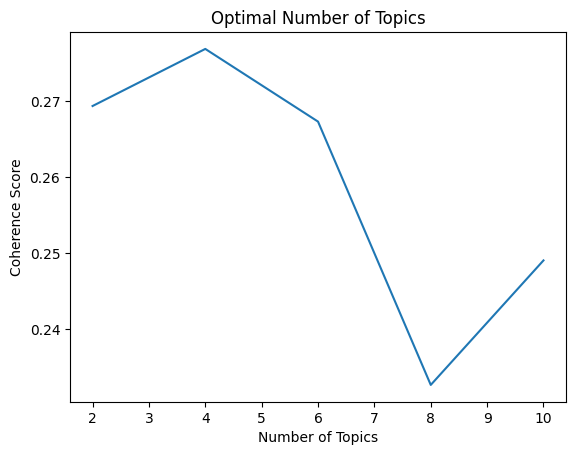

Optimal number of topics: 4
Topic 1: 0.022*"movi" + 0.015*"like" + 0.014*"feel" + 0.014*"film" + 0.009*"love" + 0.008*"nora" + 0.008*"one" + 0.008*"way" + 0.008*"stori" + 0.008*"long"
Topic 2: 0.026*"movi" + 0.014*"charact" + 0.013*"time" + 0.011*"stori" + 0.011*"one" + 0.010*"realli" + 0.009*"live" + 0.009*"feel" + 0.009*"nolan" + 0.009*"much"
Topic 3: 0.019*"movi" + 0.014*"like" + 0.013*"love" + 0.011*"film" + 0.010*"nora" + 0.010*"sung" + 0.010*"hae" + 0.009*"scene" + 0.009*"charact" + 0.009*"feel"
Topic 4: 0.020*"movi" + 0.019*"oppenheim" + 0.017*"one" + 0.014*"film" + 0.013*"feel" + 0.012*"nolan" + 0.012*"realli" + 0.011*"scene" + 0.010*"actor" + 0.010*"like"


In [8]:
# Write your code here
!pip install pandas gensim matplotlib nltk
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download("stopwords")
nltk.download("punkt")

data = pd.read_csv("imdb_movies.csv")  # Load the IMDB movies dataset
data
def preprocess_text(text):
    # converting to lowercase
    text = re.sub(r'\W', ' ', str(text))  # removing punctuations
    text = re.sub(r'\d', '', text)
    text = text.lower()

    stop_words = set(stopwords.words("english"))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    return tokens

data['processed_text'] = data['Cleaned_Review'].apply(preprocess_text)  # Use Cleaned_Review for processing
dictionary = corpora.Dictionary(data['processed_text'])
corpus = [dictionary.doc2bow(text) for text in data['processed_text']]

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                random_state=42,
                                                update_every=1,
                                                passes=10,
                                                alpha="auto",
                                                per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

start, limit, step = 2, 12, 2
# computing coherence values
model_list, coherence_values = compute_coherence_values(dictionary, corpus, data['processed_text'], start, limit, step)

# plotting coherence values
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

optimal_model_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_model_index]
optimal_k = x[optimal_model_index]
print(f"Optimal number of topics: {optimal_k}")

topics = optimal_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx+1}: {topic}")

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


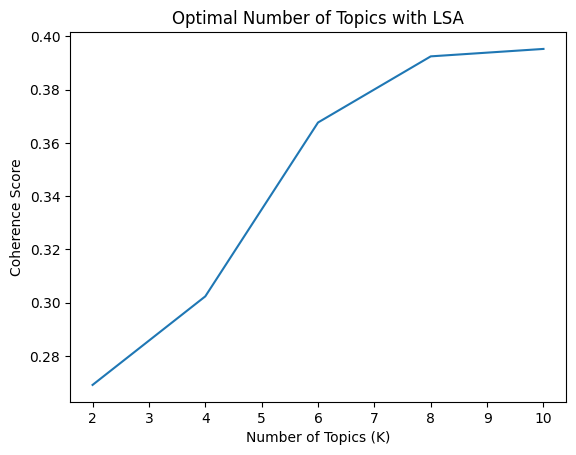

Optimal number of topics: 10
Topic summary:
Topic 1: one, like, movi, nolan, movie, scene, film, nora, sung, hae
Topic 2: nolan, oppenheimer, oppenheim, one, actor, tell, never, really, realli, film
Topic 3: movi, movie, much, better, great, time, get, feel, also, story
Topic 4: feel, film, though, like, one, past, long, bit, live, hour
Topic 5: like, feel, felt, arthur, film, hour, would, even, one, scene
Topic 6: life, bit, lee, song, behind, know, path, along, husband, movie
Topic 7: movi, movie, well, also, long, good, korean, love, rather, past
Topic 8: act, might, great, oppenheimer, point, manhattan, jump, trinity, man, oppenheim
Topic 9: good, might, like, get, say, see, theater, either, mani, movi
Topic 10: might, film, charact, husband, emot, see, live, characters, part, didnt


In [9]:
# Write your code here
!pip install pandas gensim scikit-learn nltk
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download("stopwords")
nltk.download("punkt")

# Load dataset
data = pd.read_csv("imdb_movies.csv")

def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))  # Remove punctuation
    text = re.sub(r'\d', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase

    # Tokenization
    stop_words = set(stopwords.words("english"))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    return ' '.join(tokens)

# Apply preprocessing to both Review and Cleaned_Review columns
data['processed_text'] = data['Review'].apply(preprocess_text) + " " + data['Cleaned_Review'].apply(preprocess_text)

vectorizer = CountVectorizer(max_features=2000)
doc_term_matrix = vectorizer.fit_transform(data['processed_text'])

def compute_coherence_values(doc_term_matrix, texts, dictionary, start, limit, step):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        # LSA for topic modeling
        svd_model = TruncatedSVD(n_components=num_topics, random_state=42)
        svd_model.fit(doc_term_matrix)
        topics = []
        terms = vectorizer.get_feature_names_out()
        for idx, component in enumerate(svd_model.components_):
            topic_terms = [terms[i] for i in component.argsort()[:-11:-1]]
            topics.append(topic_terms)

        # Gensim
        coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        model_list.append(svd_model)

    return model_list, coherence_values

tokenized_texts = [text.split() for text in data['processed_text']]
dictionary = corpora.Dictionary(tokenized_texts)

# Parameters
start, limit, step = 2, 12, 2
model_list, coherence_values = compute_coherence_values(doc_term_matrix, tokenized_texts, dictionary, start, limit, step)

# Plotting coherence values
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics with LSA")
plt.show()

# Determine the optimal number of topics
optimal_model_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_model_index]
optimal_k = x[optimal_model_index]
print(f"Optimal number of topics: {optimal_k}")

# Topic summary
terms = vectorizer.get_feature_names_out()
print("Topic summary:")
for idx, component in enumerate(optimal_model.components_):
    topic_terms = [terms[i] for i in component.argsort()[:-11:-1]]
    print(f"Topic {idx+1}: {', '.join(topic_terms)}")


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [10]:
# Write your code here

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00
Loading and preprocessing data...


2024-11-02 02:43:09,397 - BERTopic - Embedding - Transforming documents to embeddings.



Performing topic modeling...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-02 02:44:30,963 - BERTopic - Embedding - Completed ✓
2024-11-02 02:44:30,968 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-02 02:44:50,116 - BERTopic - Dimensionality - Completed ✓
2024-11-02 02:44:50,118 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-02 02:44:50,209 - BERTopic - Cluster - Completed ✓
2024-11-02 02:44:50,237 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-02 02:44:50,394 - BERTopic - Representation - Completed ✓


Coherence Score: 0.8441

Generating visualizations...
Error in visualization: True

Analyzing topics...


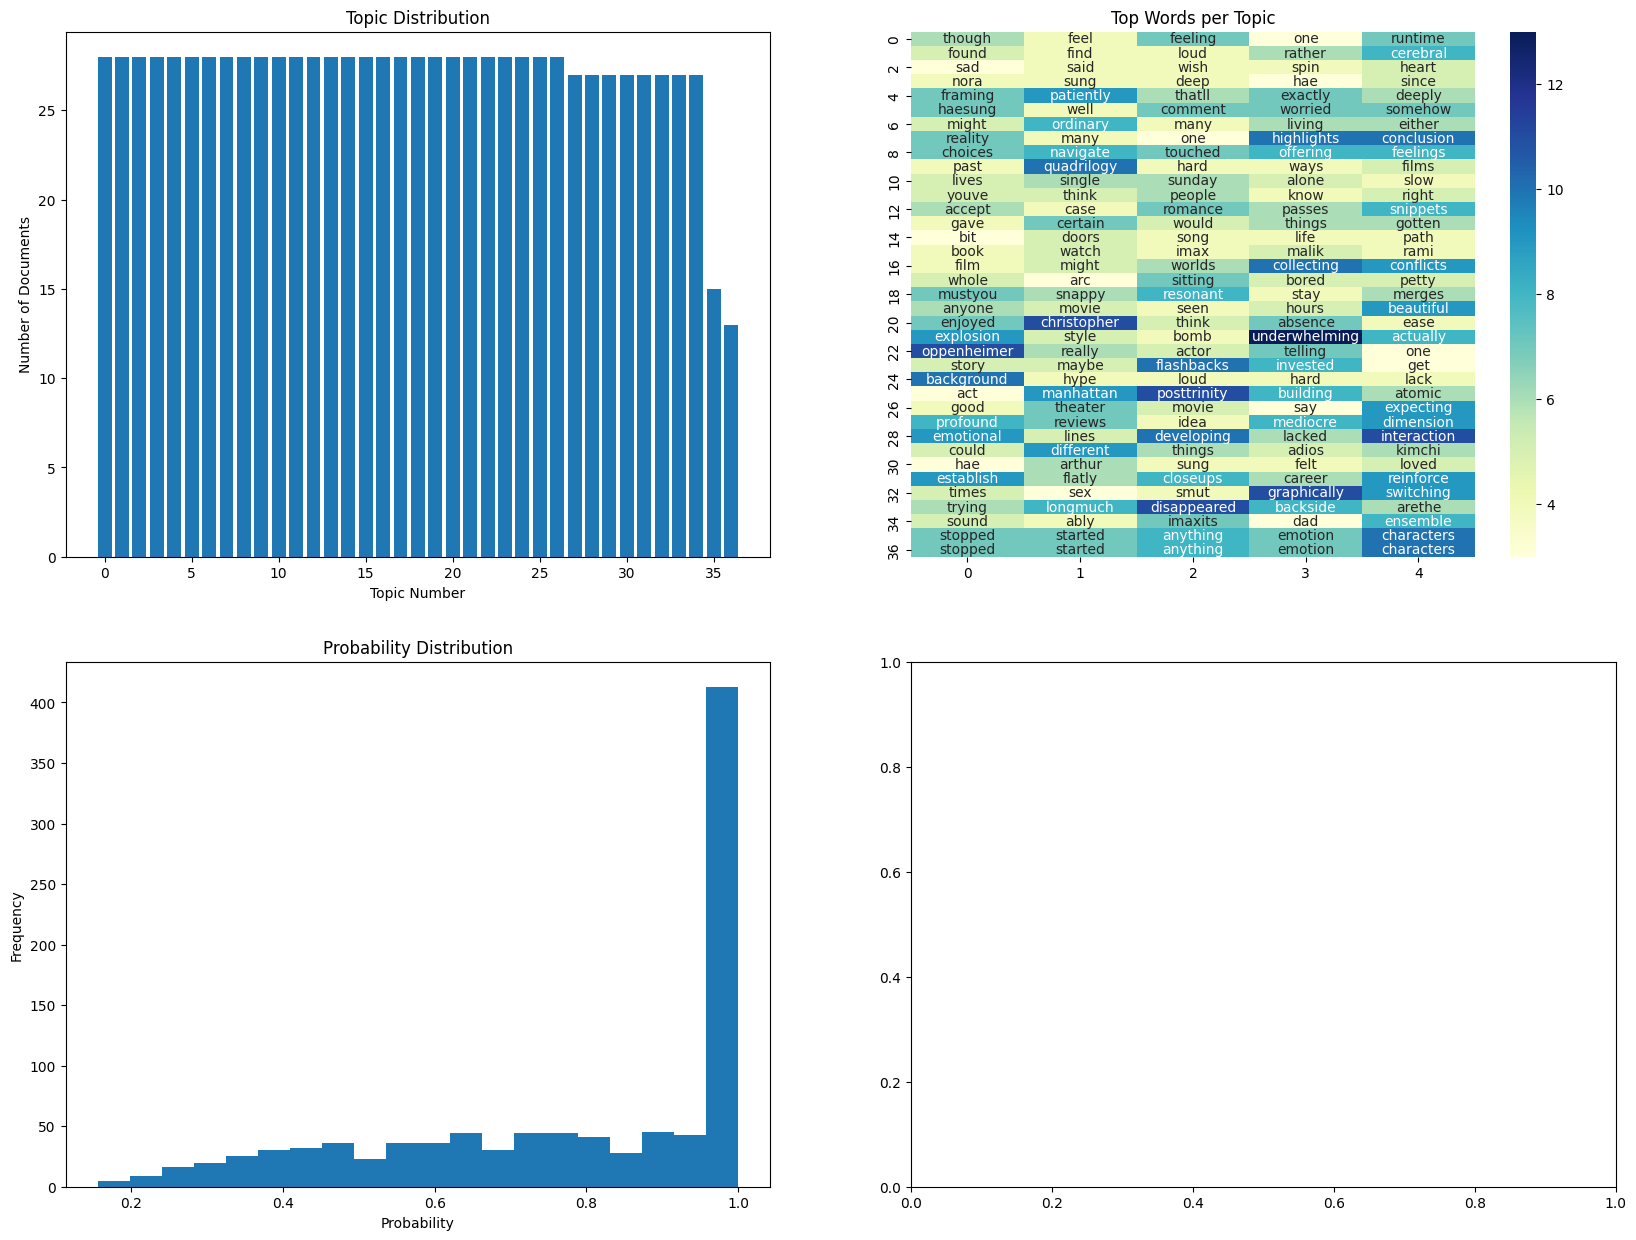

In [13]:
!pip install bertopic
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords and punkt tokenizer
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Function for advanced text preprocessing
def advanced_preprocess_text(text):
    text = str(text) if pd.notna(text) else ''
    # Lowercase
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    # Tokenization
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {'like', 'want', 'work', 'team', 'manager', 'amazon'}
    stop_words.update(custom_stop_words)
    tokens = [
        word for word in tokens
        if word not in stop_words and len(word) > 2
    ]
    return ' '.join(tokens)

# Load and preprocess data
def load_and_preprocess_data(file_path):
    try:
        df = pd.read_csv(file_path)
        # Process the 'Review' column
        df['processed_text'] = df['Review'].fillna('').apply(advanced_preprocess_text)
        df = df[df['processed_text'].str.strip() != '']  # Remove empty entries
        return df
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return None

# Perform topic modeling
def perform_topic_modeling(df, num_topics=None):
    df = df[df['processed_text'].str.split().str.len() > 5]  # Filter short texts
    texts = df['processed_text'].tolist()

    try:
        topic_model = BERTopic(
            embedding_model="all-MiniLM-L6-v2",
            min_topic_size=10,
            nr_topics=num_topics,
            verbose=True
        )

        # Fitting the model
        topics, probs = topic_model.fit_transform(texts)

        # Prepare data for coherence calculation
        tokenized_texts = [text.split() for text in texts]
        dictionary = Dictionary(tokenized_texts)

        # Get topic words in the format needed for coherence calculation
        topic_words = []
        unique_topics = sorted(list(set(topics)))
        for topic in unique_topics:
            if topic != -1:  # Skip outlier topic
                # Get top 10 words for the topic
                words = [word for word, _ in topic_model.get_topic(topic)][:10]
                topic_words.append(words)

        # Calculate coherence only if we have valid topics
        if topic_words:
            coherence_model = CoherenceModel(
                topics=topic_words,
                texts=tokenized_texts,
                dictionary=dictionary,
                coherence='c_v'
            )
            coherence_score = coherence_model.get_coherence()
            print(f"Coherence Score: {coherence_score:.4f}")
        else:
            print("No valid topics found for coherence calculation")

        return topic_model, topics, probs, df
    except Exception as e:
        print(f"Error in topic modeling: {str(e)}")
        return None, None, None, df

# Visualization
def visualize_topics(topic_model, topics, df, probs):
    try:
        plt.figure(figsize=(20, 15))

        plt.subplot(2, 2, 1)
        unique_topics = np.unique(topics)
        topic_counts = [np.sum(topics == topic) for topic in unique_topics if topic != -1]
        plt.bar(range(len(topic_counts)), topic_counts)
        plt.title('Topic Distribution')
        plt.xlabel('Topic Number')
        plt.ylabel('Number of Documents')

        plt.subplot(2, 2, 2)
        topic_words = []
        for topic in unique_topics:
            if topic != -1:
                words = topic_model.get_topic(topic)
                topic_words.append([word for word, _ in words[:5]])

        # Creating heatmap
        if topic_words:  # Only create heatmap if we have valid topics
            word_matrix = np.zeros((len(topic_words), 5))
            for i, words in enumerate(topic_words):
                for j, word in enumerate(words):
                    word_matrix[i, j] = len(word)
            sns.heatmap(
                word_matrix,
                annot=topic_words,
                fmt='',
                cmap='YlGnBu'
            )
        plt.title('Top Words per Topic')

        plt.subplot(2, 2, 3)
        plt.hist(probs, bins=20)
        plt.title('Probability Distribution')
        plt.xlabel('Probability')
        plt.ylabel('Frequency')

        plt.subplot(2, 2, 4)
        rep_doc_lengths = [len(doc.split()) for doc in df['processed_text'][topics != -1]]
        plt.hist(rep_doc_lengths, bins=20)
        plt.title('Representative Document Lengths')
        plt.xlabel('Number of Words')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

        return topic_model, topics
    except Exception as e:
        print(f"Error in visualization: {str(e)}")
        return topic_model, topics

def analyze_topics(topic_model, topics, df):

    pass

def save_results(topic_summary, output_file="topic_analysis_results.txt"):

    pass

def main():
    input_file = "imdb_movies.csv"
    output_file = "topic_analysis_results.txt"
    num_topics = None
    print("Loading and preprocessing data...")
    df = load_and_preprocess_data(input_file)
    if df is None:
        return

    print("\nPerforming topic modeling...")
    topic_model, topics, probs, processed_df = perform_topic_modeling(df, num_topics)
    if topic_model is None:
        return

    print("\nGenerating visualizations...")
    final_topic_model, final_topics = visualize_topics(topic_model, topics, processed_df, probs)
    print("\nAnalyzing topics...")
    topic_summary = analyze_topics(final_topic_model, final_topics, processed_df)
    if topic_summary is None:
        return

    print("\nSaving results...")
    save_results(topic_summary, output_file)

    print("\nAnalysis complete!")

if __name__ == "__main__":
    main()

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


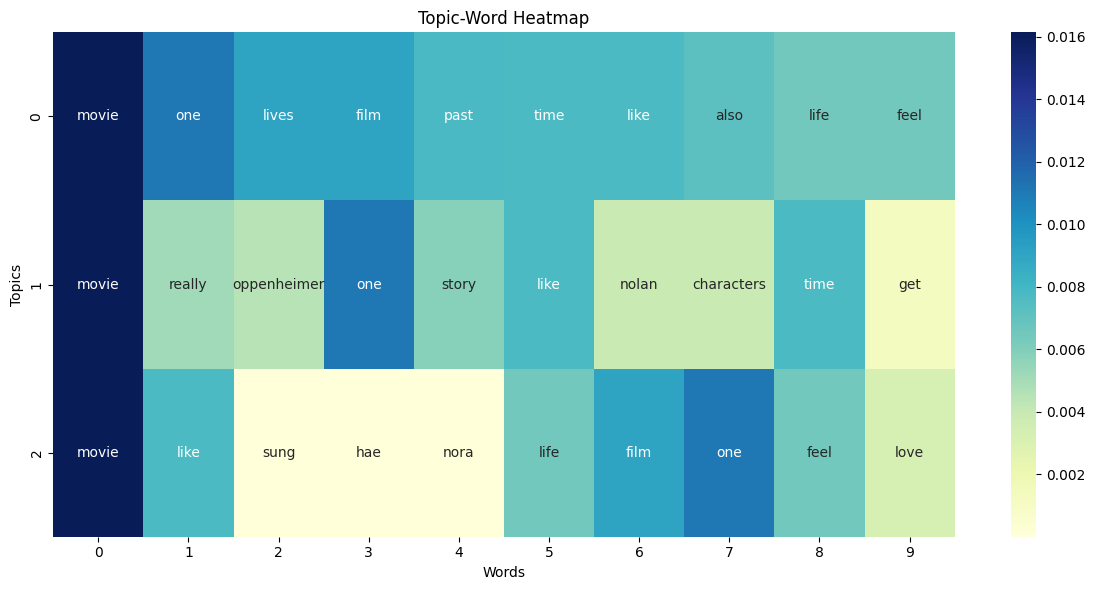

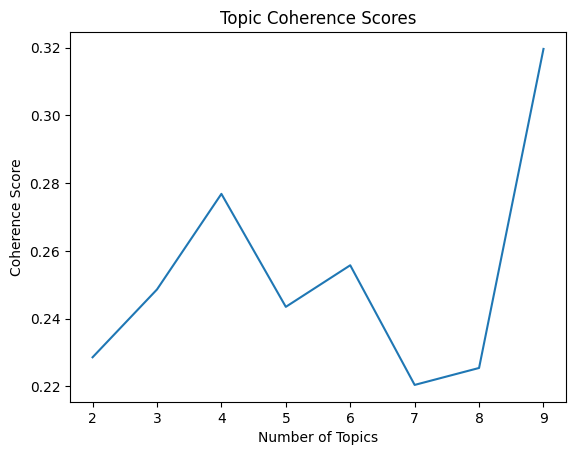

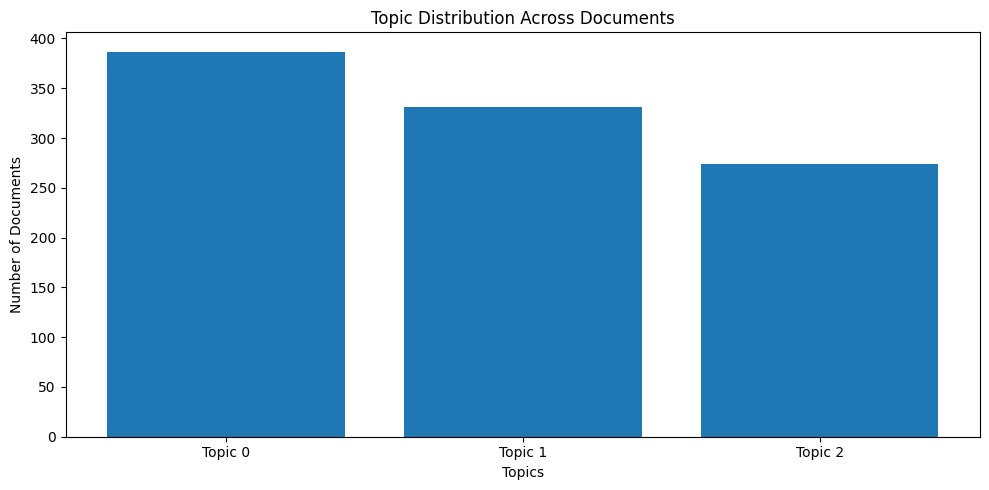

In [14]:
!pip install pyLDAvis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')

# preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return tokens

df = pd.read_csv('imdb_movies.csv')

# Use the Cleaned_Review for analysis
documents = df['Review'].apply(preprocess_text)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Set number of topics
num_topics = 3

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

def plot_topic_word_heatmap(lda_model, dictionary, num_topics):
    topic_words = []
    for topic_id in range(num_topics):
        top_words = lda_model.show_topic(topic_id, topn=10)
        topic_words.append([word for word, _ in top_words])

    plt.figure(figsize=(12, 6))
    topic_matrix = np.zeros((num_topics, 10))

    for i, topic in enumerate(topic_words):
        for j, word in enumerate(topic):
            topic_matrix[i, j] = lda_model.get_term_topics(dictionary.token2id[word], minimum_probability=0)[0][1]

    sns.heatmap(topic_matrix, annot=topic_words, cmap='YlGnBu', fmt='')
    plt.title('Topic-Word Heatmap')
    plt.xlabel('Words')
    plt.ylabel('Topics')
    plt.tight_layout()
    plt.show()
from gensim.models import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def create_pyldavis(lda_model, corpus, dictionary):
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.save_html(vis, 'lda_visualization.html')
    return vis

def plot_topic_distribution(lda_model, corpus, num_topics):
    topic_distribution = [lda_model.get_document_topics(doc) for doc in corpus]
    topic_counts = np.zeros(num_topics)
    for doc in topic_distribution:
        for topic_num, prob in doc:
            topic_counts[topic_num] += prob
    plt.figure(figsize=(10, 5))
    plt.bar(range(num_topics), topic_counts)
    plt.xticks(range(num_topics), [f'Topic {i}' for i in range(num_topics)])
    plt.xlabel('Topics')
    plt.ylabel('Number of Documents')
    plt.title('Topic Distribution Across Documents')
    plt.tight_layout()
    plt.show()

# Plotting the results
plot_topic_word_heatmap(lda_model, dictionary, num_topics)
model_list, coherence_values = compute_coherence_values(dictionary, corpus, documents, 10)
plt.plot(range(2, 10), coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Topic Coherence Scores')
plt.show()

pyldavis_plot = create_pyldavis(lda_model, corpus, dictionary)
plot_topic_distribution(lda_model, corpus, num_topics)



1

 Topic Word Heatmap shows us relationship between topics and its like a temperature map, darker the cell represent how each word is in the topic.

2

 PyLDAvis visualization gives interactive visualization which helps to explore the topics in detail, here each bubble represents a topic distance bw them indicates how distinct they are.

3

 Plot topic distribution Bar graph visualization gives the distribution of topics across documents in the corpus. we can find most occuring topics

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [16]:
# Write your code here
LDA works well using probabilitic distributions, limitation of lda is it doesnot work well for overlapping themes
and LSA works well using border thematic structures via matrix decomposition but it relies on matrix algebra
rather than probability Ida2Vec works well for compleax relationships and it require more computational resources
and Bertopic uses transformer based embeddings and this has higher coherence score but this also requires
higher computational resources like Ida2Vec

BERTopic is better because it levarages transformer based embeddings and it finds meanings exists in datasets
and it can update topic if the input data is dynamic and BERT has rich topic representation.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
I have gained practical experience and knowledge in generating insights from unstructured data and challenges
i faced are is topic interpretation where i had to check that the generated topics and meaningful and finding
optimal number of topics, this is relevant to my field of study because of topics covered such as feauture
extraction, dimentionality reduction.



'''

'\nPlease write you answer here:\nI have gained practical experience and knowledge in generating insights from unstructured data and challenges\ni faced are is topic interpretation where i had to check that the generated topics and meaningful and finding\noptimal number of topics, this is relevant to my field of study because of topics covered such as feauture\nextraction, dimentionality reduction.\n\n\n\n'